<a href="https://colab.research.google.com/github/Aniketsudke/Dry-Bean-Classification/blob/main/SC_DryBeanClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Import Dataset

In [ ]:


# dataset = '/content/drive/MyDrive/Dry_Bean_Dataset.csv' #Harshada
dataset = '/content/drive/MyDrive/SC Project/Info/Dry_Bean_Dataset.csv' #Aniket

import pandas as pd
df = pd.read_csv(dataset)

# Dataset Information

In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [ ]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [ ]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
df.describe().transpose()

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860154  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

In [ ]:
df.shape

(13611, 17)

# Outliers

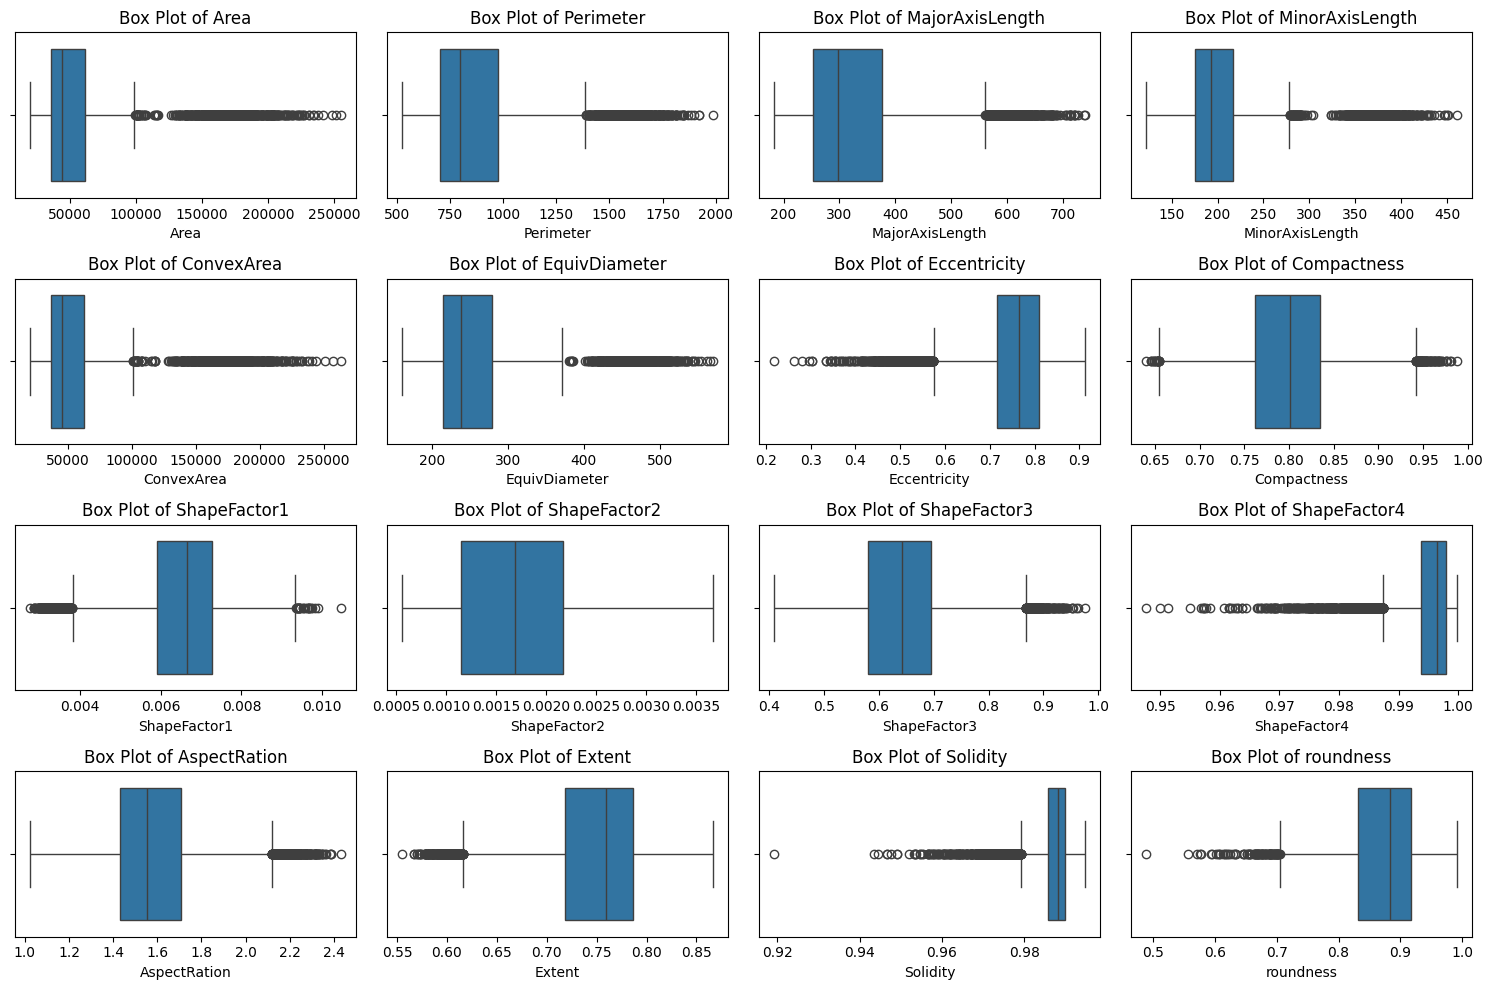

In [ ]:
parameters = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
              'ConvexArea', 'EquivDiameter', 'Eccentricity', 'Compactness',
              'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4','AspectRation', 'Extent','Solidity','roundness']

fig, axes = plt.subplots(nrows=4,ncols=4,figsize=(15,10))

axes= axes.flatten()
for i,j in enumerate(parameters):
    sns.boxplot(x=df[j],ax=axes[i])
    axes[i].set_xlabel(j)
    axes[i].set_title(f'Box Plot of {j}')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

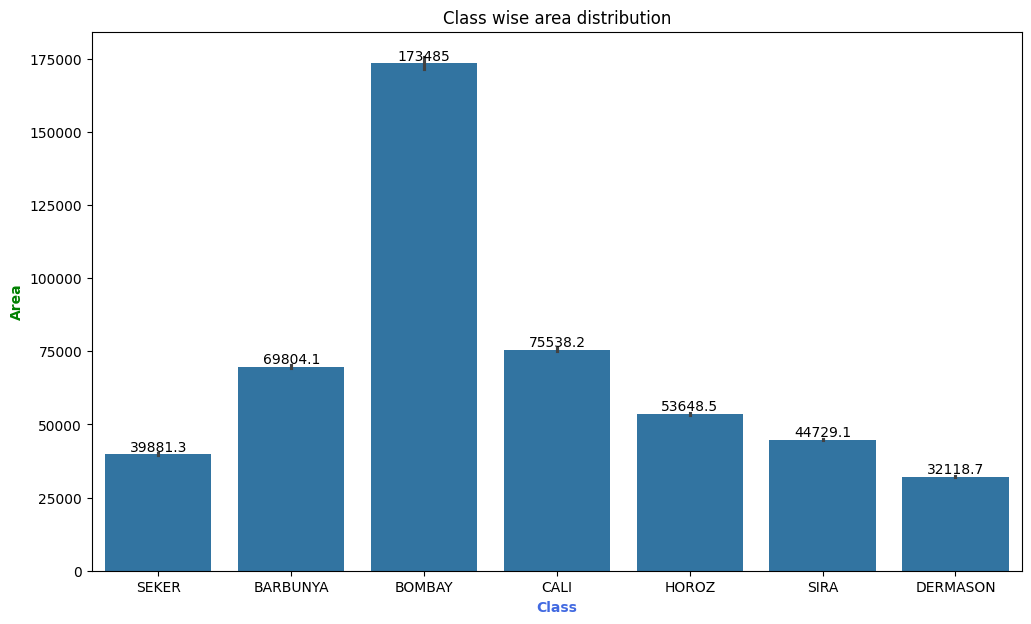

In [ ]:
plt.figure(figsize=(12,7))
ax= sns.barplot(x=df['Class'],y=df['Area'],data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Class',weight='bold',color='royalblue')
plt.ylabel('Area', color='green',weight='bold')
plt.title("Class wise area distribution")
plt.show()

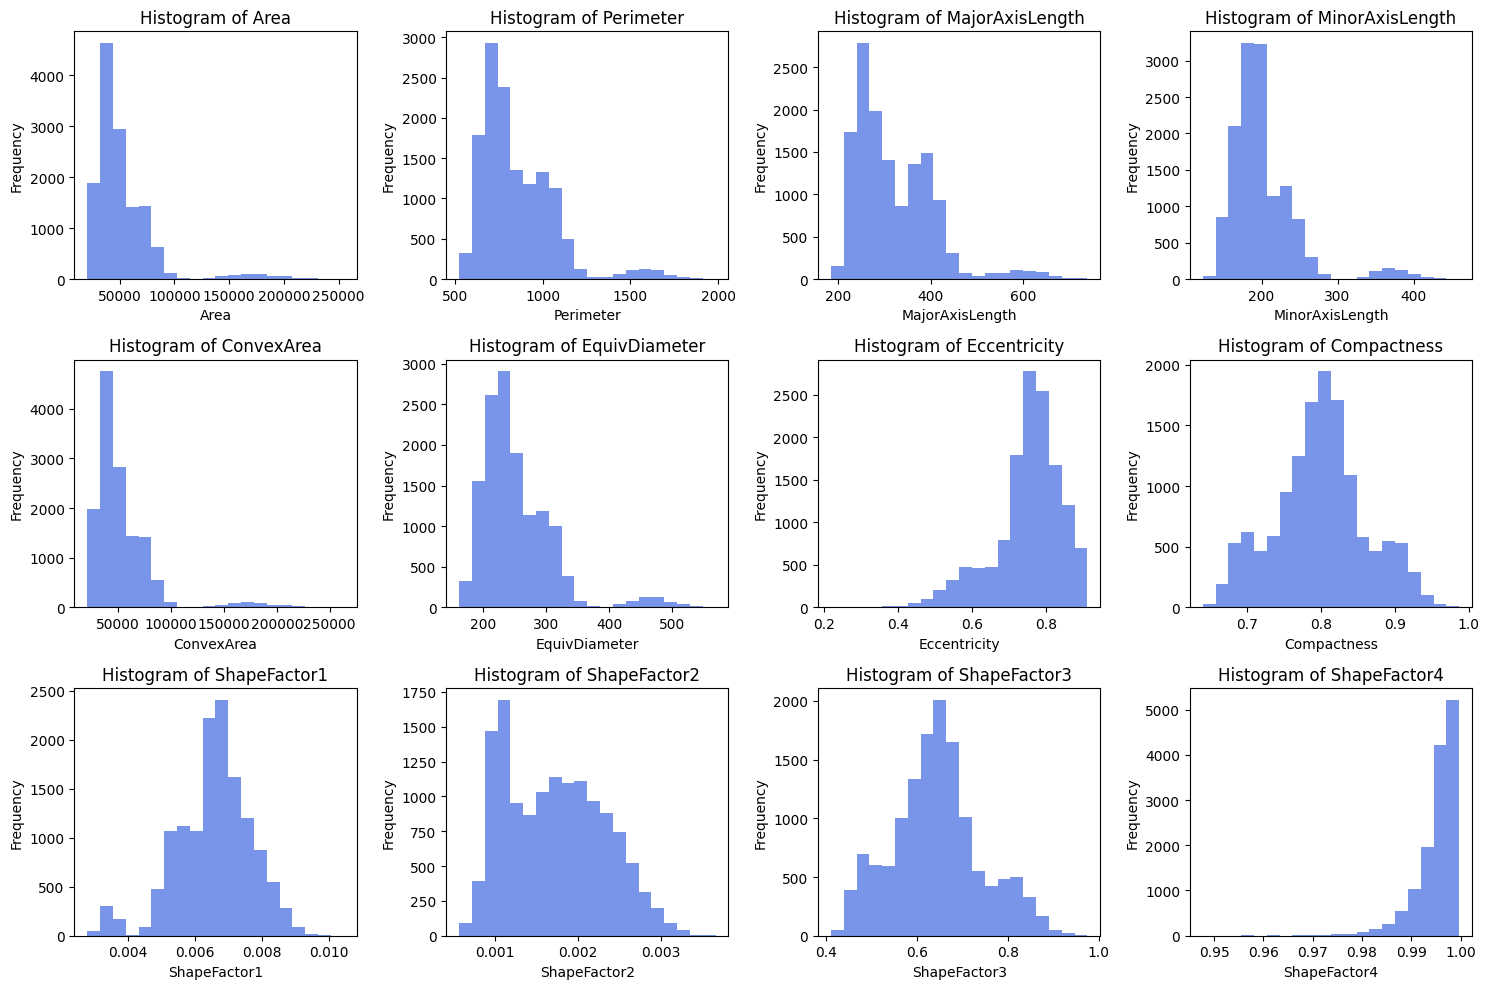

In [ ]:
parameters = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
              'ConvexArea', 'EquivDiameter', 'Eccentricity', 'Compactness',
              'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10))

axes= axes.flatten()
for i,j in enumerate(parameters):
    axes[i].hist(df[j],bins=20,color='royalblue',alpha=0.7)
    axes[i].set_xlabel(j)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {j}')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

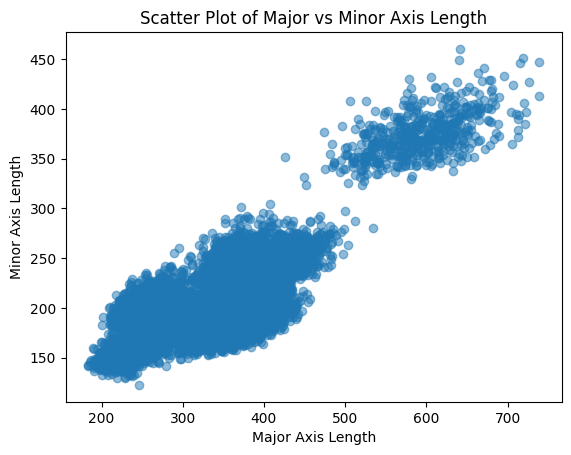

In [ ]:
plt.scatter(df['MajorAxisLength'], df['MinorAxisLength'], alpha=0.5)
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')
plt.title('Scatter Plot of Major vs Minor Axis Length')
plt.show()

Text(0.5, 1.0, 'Bar Chart of Class Distribution')

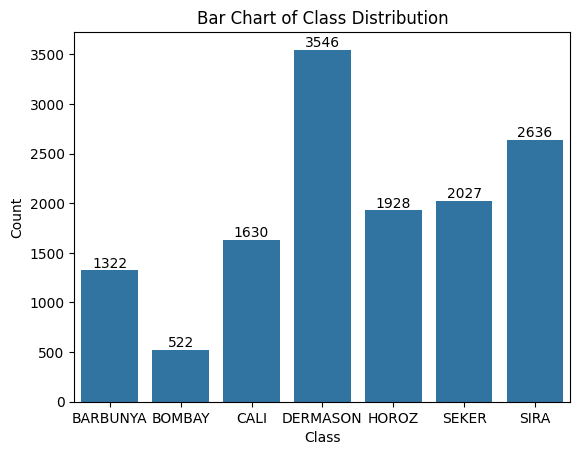

In [ ]:
ax = sns.barplot(x='Class', y='Count', data=df.groupby('Class').size().reset_index(name='Count'))
ax.bar_label(ax.containers[0])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart of Class Distribution')

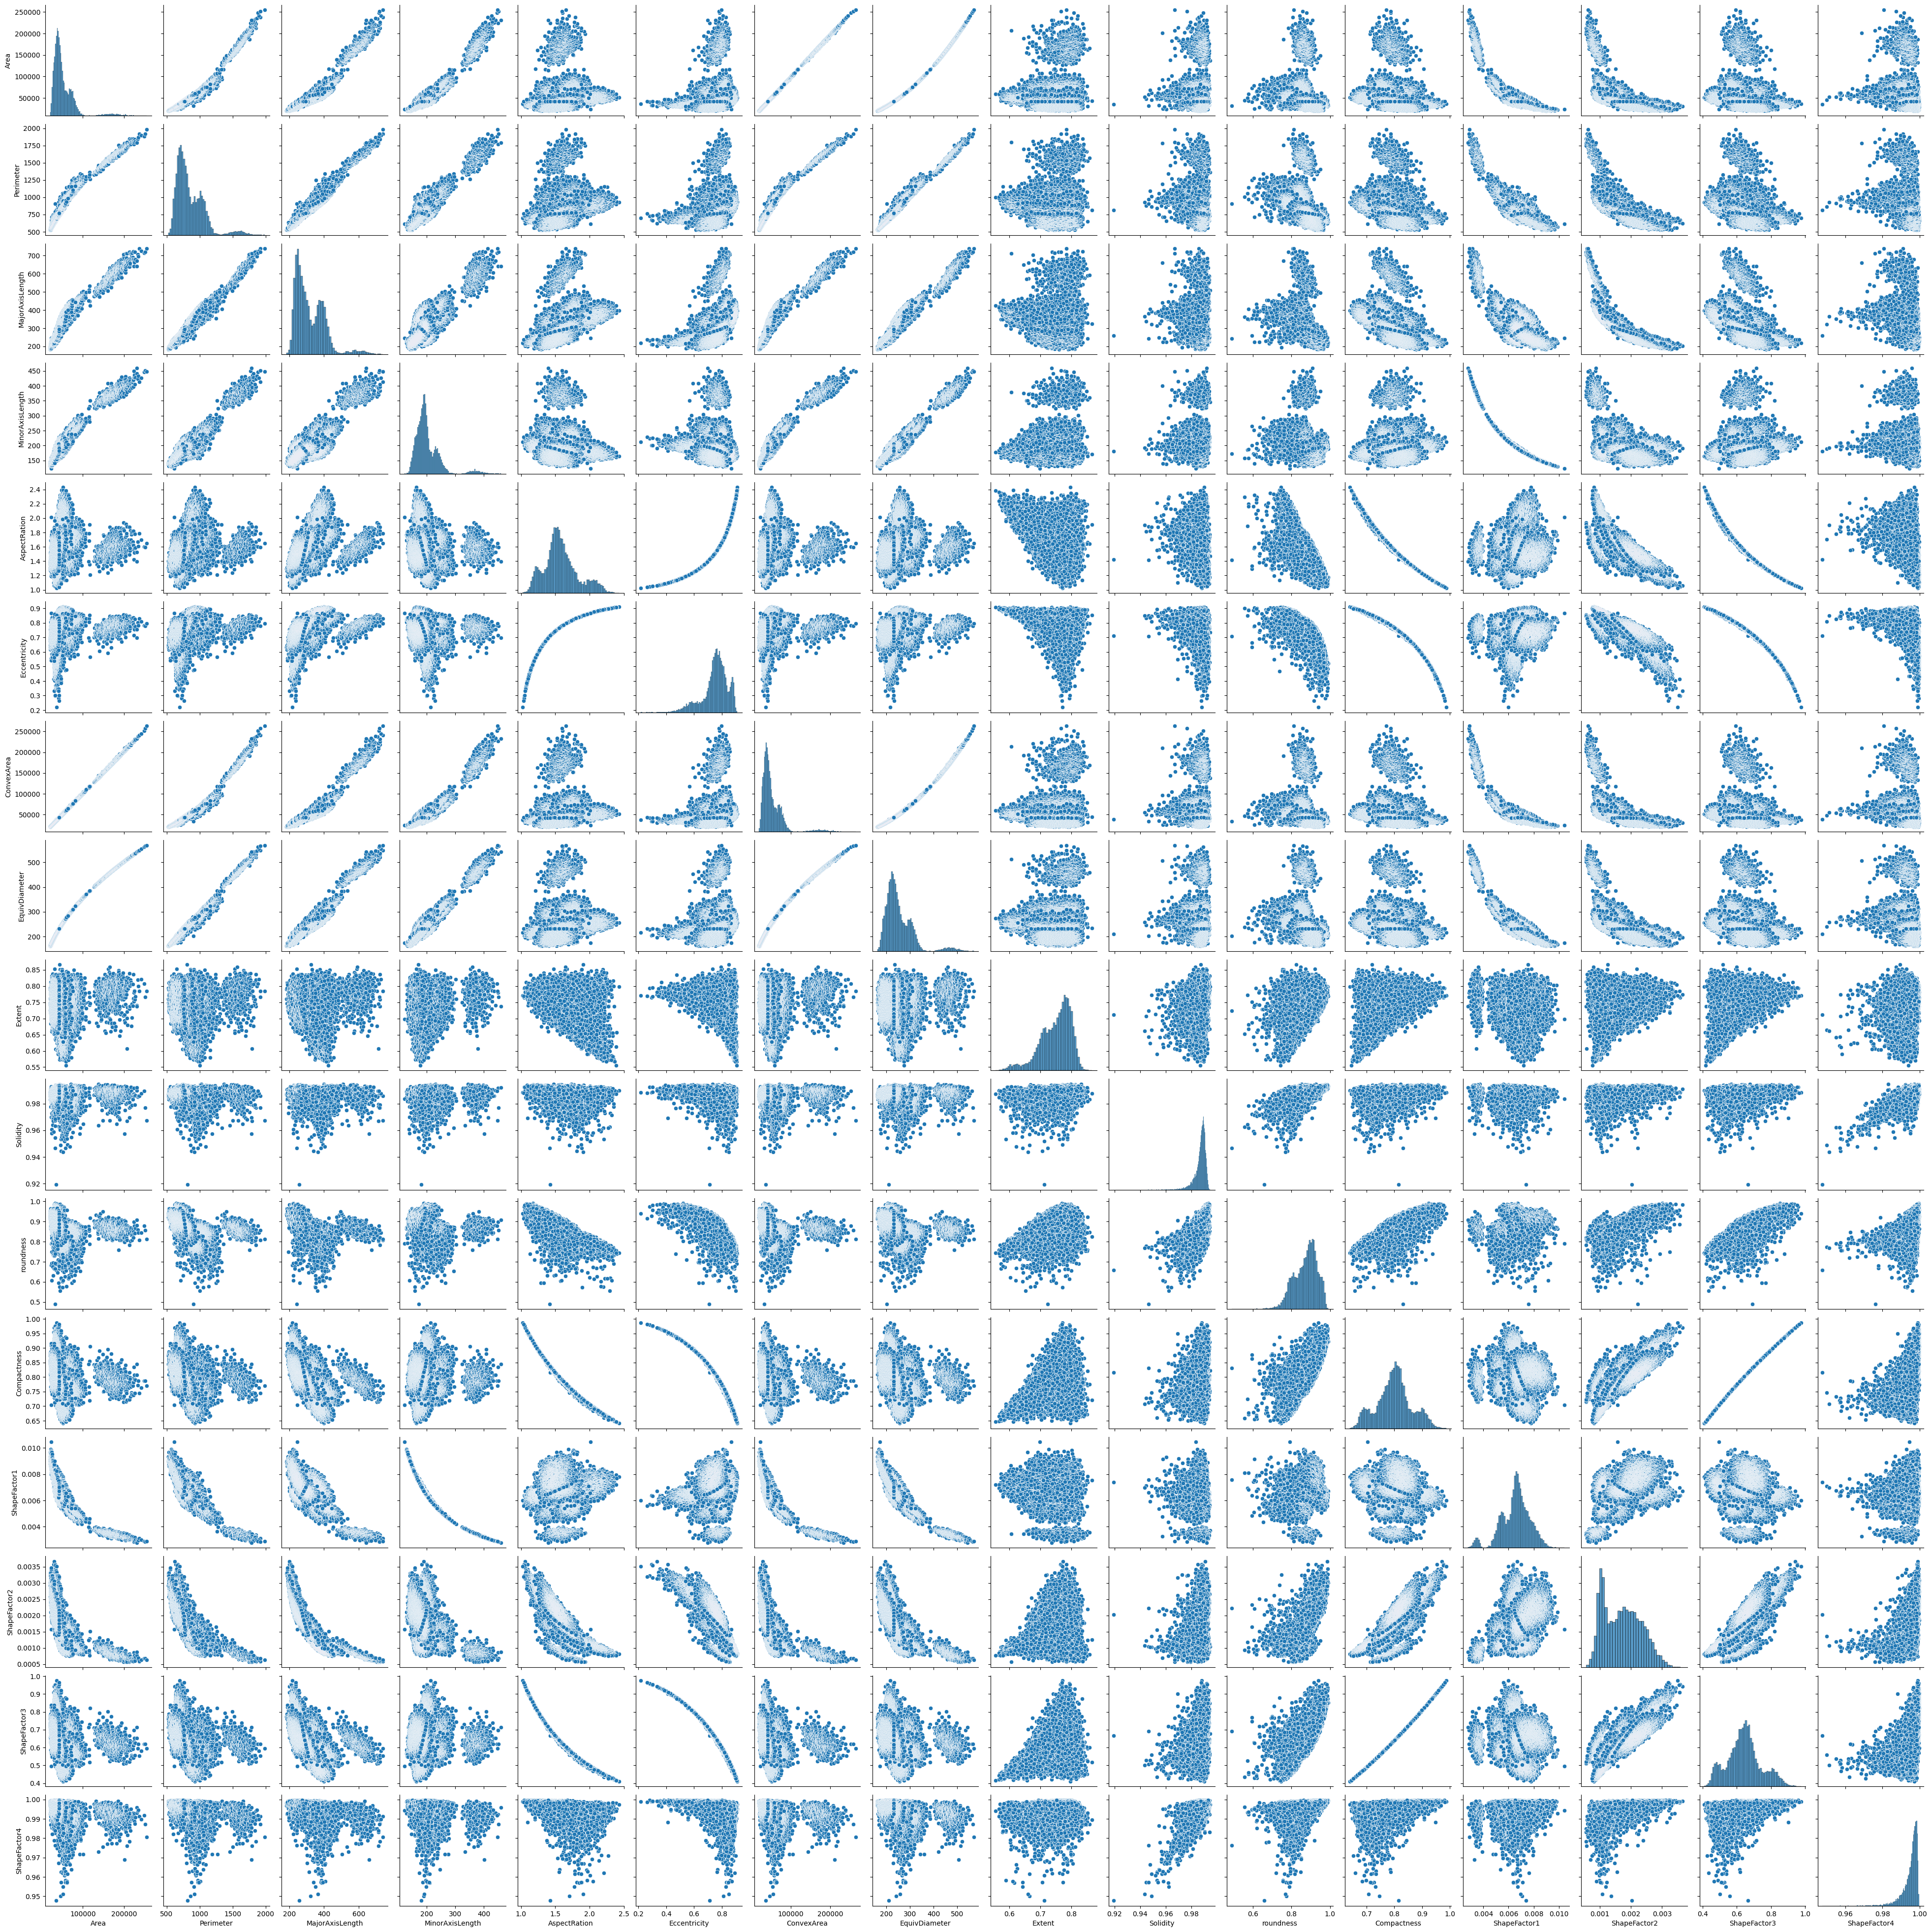

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Class_encoded'] = label_encoder.fit_transform(df['Class'])

df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  \
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER   
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER   
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER   
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER   
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER   

   Class_encoded  
0              5  
1              5  
2              5  
3              5  
4              5

In [ ]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

Class Mapping:
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


In [ ]:
df = df.drop('Class',axis='columns')

In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.913358      0.007332      0.003147      0.834222      0.998724   
1     0.953861      0.006979      0.003564      0.909851      0.998430   
2     0.908774      0.007244      0.003048      0.825871      0.999066   
3     0.928329      0.007017      0.003215      0.861794      0.994199   
4     0.970516      0.006697      0.003665      0.941900      0.999166   

   Class_encoded  
0              5  
1              5  
2              5  
3              5  
4              5

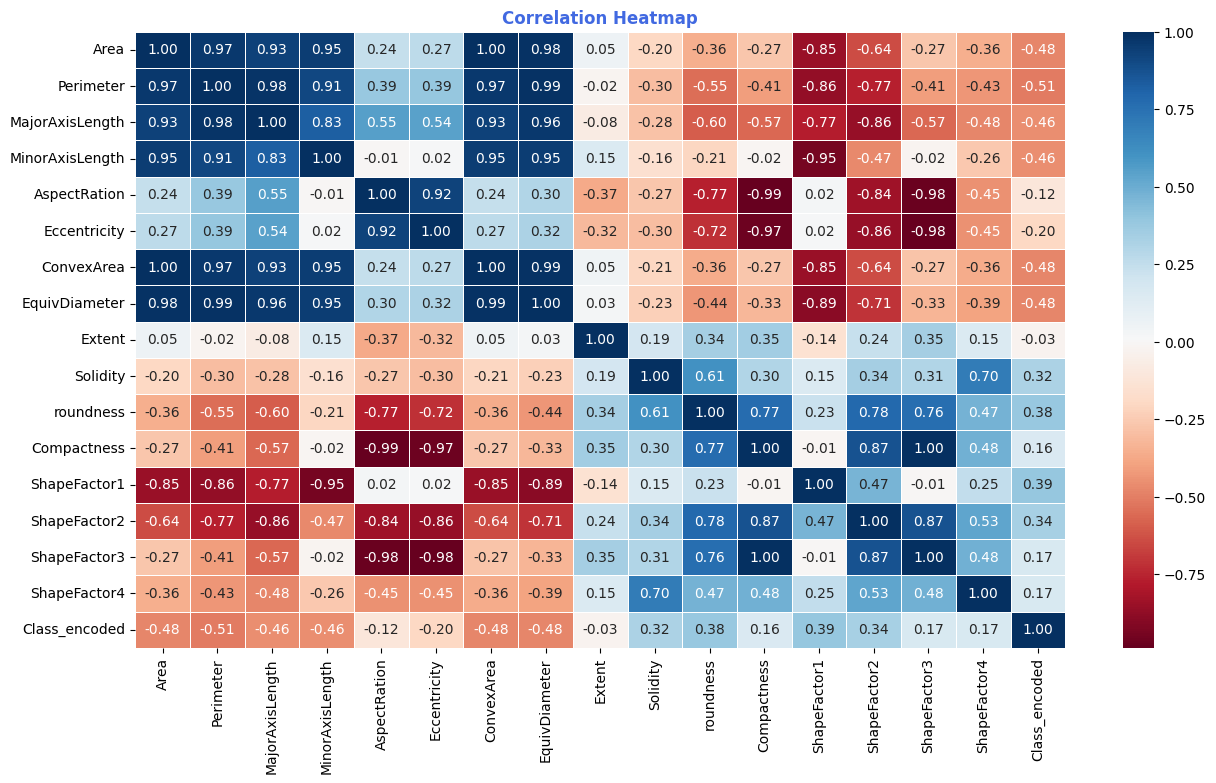

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap',color='royalblue',weight='bold')
plt.show()

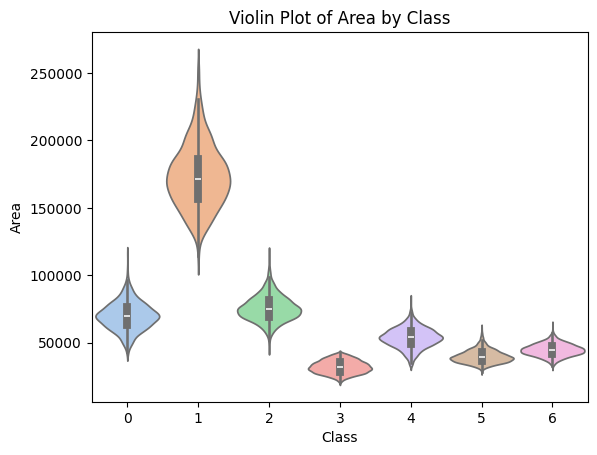

In [ ]:
sns.violinplot(x=df['Class_encoded'], y=df['Area'],width=0.9,palette='pastel')
plt.xlabel('Class')
plt.ylabel('Area')
plt.title('Violin Plot of Area by Class')
plt.show()

# Standardization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class_encoded    13611 non-null  int64  
dtypes: float64(1

In [ ]:
df_num=df.select_dtypes(['float64','int64'])

In [ ]:
df_num

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       Class_encoded  
0                  5  
1                  5  
2                  5  
3                  5  
4                  5  
...              ...  
13606              3  
13607              3  
13608              3  
13609              3  
13610              3  

[13611 rows x 17 columns]

In [ ]:
X = df_num.drop(['Class_encoded'], axis=1)
y = df_num['Class_encoded']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((9119, 16), (4492, 16))

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.16268331, -0.08118165,  0.03667287, ..., -0.48323322,
        -0.56164783, -0.62856676],
       [ 0.12672764,  0.31842734,  0.50159288, ..., -0.89235879,
        -0.96728533, -0.25505711],
       [-0.25008542,  0.0706583 ,  0.35431488, ..., -1.10017912,
        -1.71844686,  0.40403851],
       ...,
       [ 1.25955019,  1.40669134,  1.59100874, ..., -1.29494582,
        -0.9520915 , -0.23631021],
       [-0.49659545, -0.66875144, -0.85382285, ...,  1.41330227,
         1.62022621,  0.85393687],
       [ 0.36149099,  0.66446579,  0.93887962, ..., -1.22059745,
        -1.40376447, -0.99376038]])

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)  #Best K = 20

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.924087266251113

# SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9332146037399822

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=0)

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.8982635796972396

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.9198575244879786

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.9234194122885129

# Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier( max_depth= 20,
    min_samples_split= 10,
    n_estimators= 100)

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.9167408726625111

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

params =  {'base_estimator': None, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}

model = BaggingClassifier(**params)

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.9209706144256455

In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
228/228 [==============================] - 2s 6ms/step - loss: 0.5663 - accuracy: 0.8367 - val_loss: 0.2943 - val_accuracy: 0.9041
Epoch 2/10
228/228 [==============================] - 1s 6ms/step - loss: 0.2364 - accuracy: 0.9184 - val_loss: 0.2393 - val_accuracy: 0.9200
Epoch 3/10
228/228 [==============================] - 2s 7ms/step - loss: 0.2111 - accuracy: 0.9221 - val_loss: 0.2446 - val_accuracy: 0.9139
Epoch 4/10
228/228 [==============================] - 2s 8ms/step - loss: 0.1998 - accuracy: 0.9272 - val_loss: 0.2301 - val_accuracy: 0.9221
Epoch 5/10
228/228 [==============================] - 1s 2ms/step - loss: 0.1956 - accuracy: 0.9289 - val_loss: 0.2396 - val_accuracy: 0.9172
Epoch 6/10
228/228 [==============================] - 1s 2ms/step - loss: 0.1929 - accuracy: 0.9280 - val_loss: 0.2363 - val_accuracy: 0.9200
Epoch 7/10
228/228 [==============================] - 1s 3ms/step - loss: 0.1937 - accuracy: 0.9280 - val_loss: 0.2347 - val_accuracy: 0.9205
Epoch 

# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6507123775601068


# Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9169634906500446


In [ ]:
pip install catboost

  Using cached catboost-1.2.3-cp310-cp310-manylinux2014_x86_64.whl (98.5 MB)


# Cat Boost Classifier

In [ ]:
from catboost import CatBoostClassifier

classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42)
classifier.fit(X_train, y_train, verbose=False)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9258682101513802


In [ ]:
pip install xgboost

# xgboost

In [ ]:
import xgboost as xgb

classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), seed=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9260908281389136


# BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7092609082813891
